In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:,.0f}'.format
plt.style.use('fivethirtyeight')

In [24]:
df_2021_excel = pd.read_excel('iPhone_2021_all_edit.xlsx')
df_2021_excel = df_2021_excel[['Product','Price','Date','Model']]
df_2021_plot = df_2021_excel[df_2021_excel['Price']>100]
df_2021_plot.sort_values(by=['Price'],ascending=False)
df_2021_plot['Date'] = pd.to_datetime(df_2021_plot['Date'])
df_2021_plot.head()

<ipython-input-24-b20f4e6857b5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021_plot['Date'] = pd.to_datetime(df_2021_plot['Date'])


,Product,Price,Date,Model
181,Apple iPhone 6 16GB 64GB 128GB Factory Unlocked AT&T Verizon TMobile Sprint Mint,100,2021-04-08,6
182,Apple iPhone 8 Plus - 64GB - Space Gray (Straight Talk) A1864 (CDMA + GSM),101,2021-01-02,8+
183,Apple iPhone 7 A1778 32GB 128GB 256GB AT&T Verizon T-Mobile or Unlocked (P),101,2021-04-08,7
184,Apple iPhone 7 32GB Black (Unlocked) Smartphone,101,2021-04-08,XR
185,Apple iPhone 6 - 64GB - Space Gray (Unlocked) A1649 (CDMA + GSM) (CA),102,2021-01-08,6


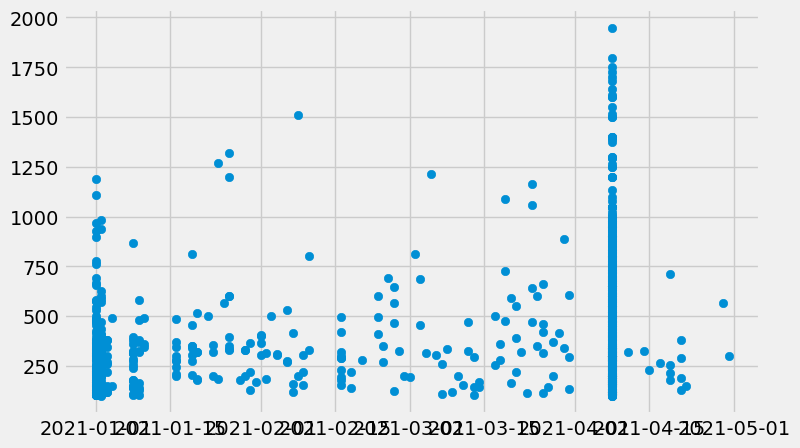

In [42]:
x = df_2021_plot['Date']
y = df_2021_plot['Price']
category = df_2021_plot['Model']

fig, ax = plt.subplots(figsize=(8,5))

ax.scatter(x, y)
plt.show()

In [3]:
df_2021_excel['Model'].value_counts().to_frame().head(8)

,Model
12,165
7,162
8,139
X,136
11,132
XR,126
XS,120
SE,92


In [4]:
df_2021_excel['Price'] = pd.to_numeric(df_2021_excel['Price'])
df_2021_excel.groupby('Model')['Price'].mean().to_frame().head()

,Price
Model,
4,16.963333
5,76.352500
6,158.290463
7,172.535114
8,226.163231


In [79]:
df_2022_excel = pd.read_excel('iPhone_2022_all_edit.xlsx')
#df_2022_excel = df_2022_excel[['Product','Price','Date','Model']]
df_2022_plot = df_2022_excel[df_2022_excel['Price']>100]
df_2022_plot['Date'] = pd.to_datetime(df_2022_plot['Date'])
df_2022_plot = df_2022_plot[['Product', 'Model', 'Price', 'Date', '% Discount', 'Months']]
#df_2022_plot["% Discount"] = df_2022_plot["% Discount"].map('{:.1f}%'.format)
df_2022_plot["% Discount"] = pd.to_numeric(df_2022_plot["% Discount"])
df_2022_plot = df_2022_plot[df_2022_plot['% Discount']>0]

<ipython-input-79-b69d68eb9b5e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022_plot['Date'] = pd.to_datetime(df_2022_plot['Date'])
<ipython-input-79-b69d68eb9b5e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022_plot["% Discount"] = pd.to_numeric(df_2022_plot["% Discount"])


In [80]:
df_2022_plot.dtypes

Product               object
Model                 object
Price                float64
Date          datetime64[ns]
% Discount           float64
Months               float64
dtype: object

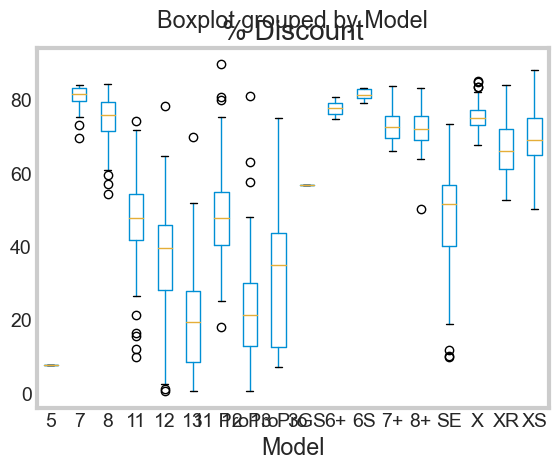

In [81]:
df_2022_plot.boxplot(by ='Model', column =['% Discount'], grid = False)
plt.show()

In [57]:
df_2022_plot['Model'].value_counts()

11        104
XR         93
12         85
X          75
8          67
11 Pro     62
12 Pro     59
SE         52
XS         48
7          37
13         33
8+         33
7+         25
13 Pro     24
6S          6
6+          2
5           1
3GS         1
Name: Model, dtype: int64

In [76]:
iphone_11 = df_2022_plot[df_2022_plot['Model']=='11']['% Discount']
iphone_XR = df_2022_plot[df_2022_plot['Model']=='XR']['% Discount']
iphone_12 = df_2022_plot[df_2022_plot['Model']=='12']['% Discount']
iphone_X = df_2022_plot[df_2022_plot['Model']=='X']['% Discount']
iphone_8 = df_2022_plot[df_2022_plot['Model']=='8']['% Discount']
iphone_11Pro = df_2022_plot[df_2022_plot['Model']=='11 Pro']['% Discount']
iphone_12Pro = df_2022_plot[df_2022_plot['Model']=='12 Pro']['% Discount']
iphone_SE = df_2022_plot[df_2022_plot['Model']=='SE']['% Discount']
iphone_XS = df_2022_plot[df_2022_plot['Model']=='XS']['% Discount']
iphone_7 = df_2022_plot[df_2022_plot['Model']=='7']['% Discount']
iphone_13 = df_2022_plot[df_2022_plot['Model']=='13']['% Discount']
iphone_8plus = df_2022_plot[df_2022_plot['Model']=='8+']['% Discount']
iphone_7plus = df_2022_plot[df_2022_plot['Model']=='7+']['% Discount']

iphones = [iphone_11, iphone_XR, iphone_12,iphone_X,
          iphone_8, iphone_11Pro, iphone_12Pro, iphone_SE,
          iphone_XS, iphone_7, iphone_13, iphone_8plus, iphone_7plus]

fig = plt.figure()
# Create an axes instance
ax = fig.add_axes([0,0,1,1])
# Create the boxplot
#bp = ax.boxplot(iphones)
#plt.show()


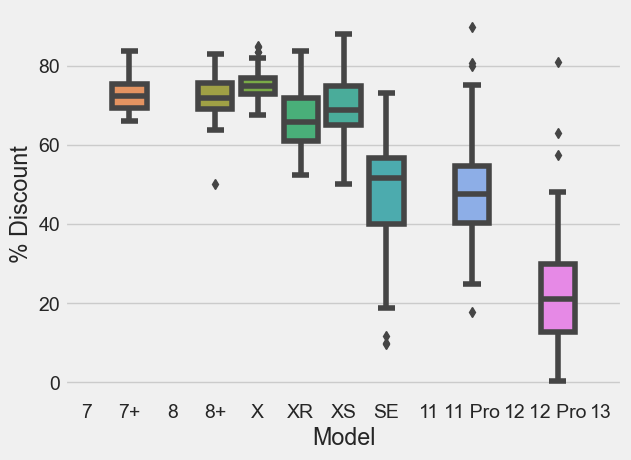

In [87]:
## seaboen
#sns.set_style("whitegrid")
plt.style.use('fivethirtyeight')
sns.boxplot(x = 'Model', y = '% Discount',order = ['7','7+','8',
                                                  '8+','X','XR','XS','SE',
                                                  '11','11 Pro','12',
                                                  '12 Pro','13'], data = df_2022_plot)
plt.show()

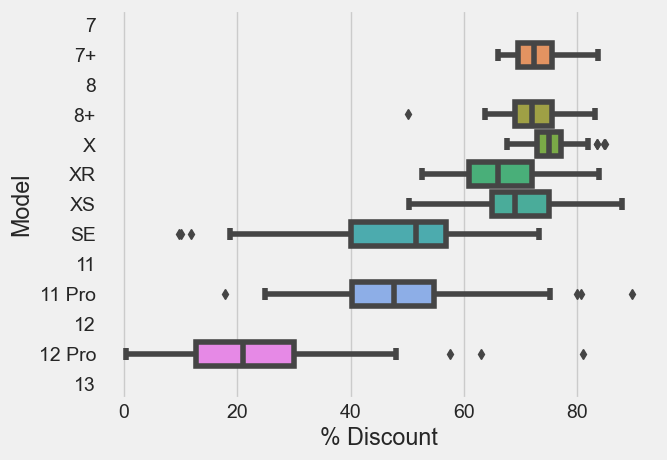

In [90]:
ax = sns.boxplot(x = '% Discount', y = 'Model',order = ['7','7+','8',
                                                  '8+','X','XR','XS','SE',
                                                  '11','11 Pro','12',
                                                  '12 Pro','13'], data = df_2022_plot)
plt.show()

In [91]:
df_2022_plot['Date'].value_counts()

2022-01-01    263
2022-08-20     17
2022-02-17     12
2022-02-22     11
2022-02-16      9
             ... 
2022-06-22      1
2022-06-24      1
2022-06-25      1
2022-06-26      1
2022-06-07      1
Name: Date, Length: 155, dtype: int64

In [38]:
df_2022_excel['Model'].value_counts().to_frame()

,Model
11,110
XR,101
12,92
8,79
SE,78
X,76
11 Pro,67
7,66
12 Pro,63
XS,54


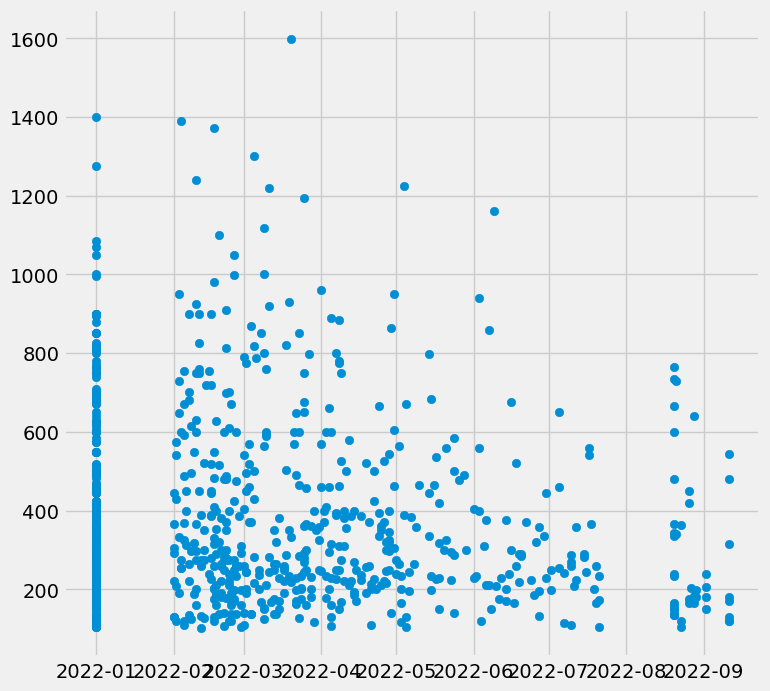

In [39]:
x = df_2022_plot['Date']
y = df_2022_plot['Price']
category = df_2022_plot['Model']

fig, ax = plt.subplots(figsize=(8,8))

ax.scatter(x, y)
plt.show()